In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import process_SMHI_data as process_data
import meteorological_temporal_data as metdata
import seaborn as sns

tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

# Read in and clean NO2 data

In [3]:
# def a plot function
def plot_function(df, rows, cols, fig_size,  y_labels, fig_path = None, savefig = False):
    fig, axes = plt.subplots(rows, cols, constrained_layout = True, figsize = fig_size)
    annots = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']

    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = .85) # linewidth default = 1.5
        ax.set_ylabel(y_labels)
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
        ax.set_xlabel('')
        j += 1
    if savefig:
        plt.savefig(fig_path)

In [4]:
# read in data and clean with import script
df_NO2 = process_data.clean_and_merge_dframes('../air_weather_data/NO2/')

In [5]:
# stations was misspelled in SMHI data
df_NO2.rename(columns={'NO$_2$, Stockholm Torkel Knutssongatan':'NO$_2$, Stockholm Torkel Knutssonsgatan',
                      'NO$_2$, Stockholm Hornsgatan 108 ': 'NO$_2$, Stockholm Hornsgatan 108', 
                      'NO$_2$, Stockholm Sveavägen 59 ':'NO$_2$, Stockholm Sveavägen 59'}, 
               inplace=True)

In [6]:
df_NO2.describe().round(3)

,"NO$_2$, Stockholm Hornsgatan 108","NO$_2$, Stockholm Sveavägen 59","NO$_2$, Stockholm E4/E20 Lilla Essingen","NO$_2$, Norr Malma","NO$_2$, Stockholm Torkel Knutssonsgatan","NO$_2$, Stockholm Sveavägen 59 Tak"
count,60747.000,60539.000,58524.000,60755.000,60826.000,59775.000
mean,33.430,28.777,31.637,2.428,10.646,12.906
std,23.144,21.781,20.123,2.201,9.651,10.350
min,0.592,0.072,0.300,0.000,0.300,-0.300
25%,15.500,12.200,16.400,1.100,4.500,5.705
50%,27.900,23.100,27.800,1.800,7.500,10.000
75%,46.000,39.700,43.000,3.000,13.200,16.900
max,189.000,212.800,172.800,47.700,113.500,104.300


In [7]:
df_NO2.columns

Index(['NO$_2$, Stockholm Hornsgatan 108', 'NO$_2$, Stockholm Sveavägen 59',
       'NO$_2$, Stockholm E4/E20 Lilla Essingen', 'NO$_2$, Norr Malma',
       'NO$_2$, Stockholm Torkel Knutssonsgatan',
       'NO$_2$, Stockholm Sveavägen 59 Tak'],
      dtype='object')

In [8]:
stations = ['NO$_2$, Norr Malma', 
            'NO$_2$, Stockholm E4/E20 Lilla Essingen',
            'NO$_2$, Stockholm Hornsgatan 108',
            'NO$_2$, Stockholm Sveavägen 59', 
            'NO$_2$, Stockholm Torkel Knutssonsgatan']
df_NO2[stations];

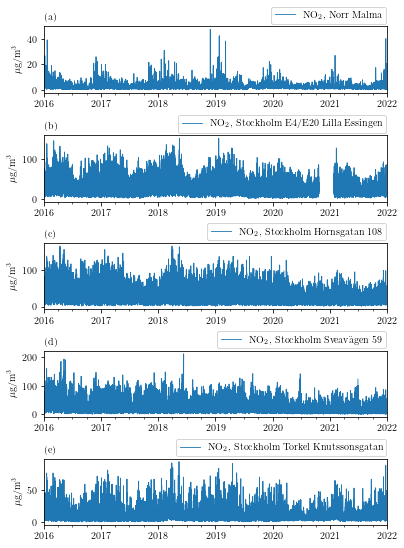

In [9]:
# plot raw PM10 data
plot_function(df_NO2[stations]['2016-01-01 00:00':], 5, 1, 
              fig_size=(5.5,7.5), 
              y_labels='$\mu$g/m$^3$', 
              fig_path='../plots/NO2_all_stations.pdf',
              savefig=True)

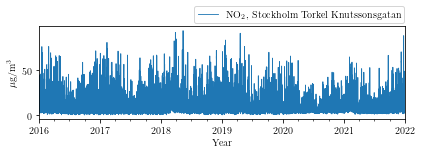

In [12]:
# plot only Torkel Knutssonsgatan station data

fig, ax = plt.subplots(constrained_layout=True, figsize=(5.75, 2.05))
df_NO2['NO$_2$, Stockholm Torkel Knutssonsgatan']['2016-01-01 00:00:00':'2022-01-01 00:00'].plot(linewidth=.85, ax=ax)
ax.set_ylabel('$\mu$g/m$^3$'), plt.xlabel('')
ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
ax.set_xlabel('Year')
plt.savefig('../plots/NO2_Torkel_Knutssonsgatan.pdf')

# fig = plt.figure(figsize=(6.5, 4), constrained_layout=True)
# spec = fig.add_gridspec(2, 2)

# ax0 = fig.add_subplot(spec[0, :])
# df_NO2.rename(columns={'NO$_2$, Stockholm Torkel Knutssonsgatan':'NO$_2$'}).iloc[:, 4]['2016-01-01':].plot(ax = ax0, linewidth = .85) # linewidth default = 1.5
# ax0.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
# ax0.annotate('(a)', xy=(0.0, 1.09), xycoords="axes fraction")
# ax0.set_xlabel('')

# ax10 = fig.add_subplot(spec[1, 1])
# df_NO2.rename(columns={'NO$_2$, Stockholm Torkel Knutssonsgatan':'NO$_2$'}).iloc[:, 4]['2018-02-05 00:00:00':'2018-02-12 00:00:00'].plot(ax = ax10) # linewidth default = 1.5
# ax10.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
# ax10.annotate('(b)', xy=(0.0, 1.09), xycoords="axes fraction")
# ax10.set_xlabel('')
# plt.rc('xtick', labelsize=8)

# ax11 = fig.add_subplot(spec[1, 0])
# df_NO2.rename(columns={'NO$_2$, Stockholm Torkel Knutssonsgatan':'NO$_2$'}).iloc[:, 4]['2018-02-05 00:00:00':'2018-02-06 00:00:00'].plot(ax = ax11) # linewidth default = 1.5
# ax11.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
# ax11.annotate('(c)', xy=(0.0, 1.09), xycoords="axes fraction")
# ax11.set_xlabel('')

# plt.savefig('../plots/NO2_year_week_day.pdf')

In [12]:
df_NO2[df_NO2 <= 0] = np.NaN
df_NO2.interpolate(inplace=True)

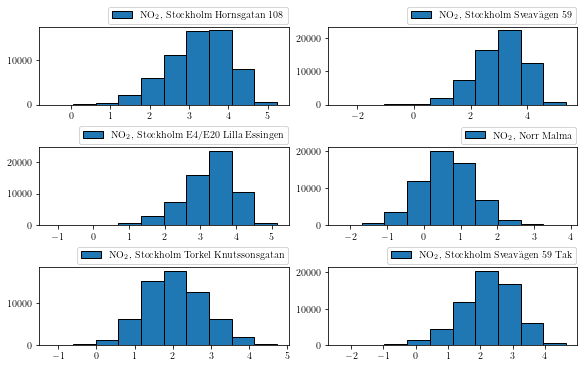

In [31]:
fig, axes = plt.subplots(3, 2, constrained_layout = True, figsize = (8,5))
annots = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']

j = 0
for i, ax in enumerate(fig.axes):
    ax.hist(np.log(df_NO2.iloc[:, j]), edgecolor='black', label=df_NO2.columns[i]) # linewidth default = 1.5
    ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
    # ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
    # ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
    ax.set_xlabel('')
    j += 1

In [9]:
# check outliers
np.sum(df_NO2 <= 0.1) # the value above 800 is most likely an outlier (surrounding values are all NaNs)

NO$_2$, Stockholm Hornsgatan 108            0
NO$_2$, Stockholm Sveavägen 59              2
NO$_2$, Stockholm E4/E20 Lilla Essingen     0
NO$_2$, Norr Malma                         21
NO$_2$, Stockholm Torkel Knutssonsgatan     0
NO$_2$, Stockholm Sveavägen 59 Tak          3
dtype: int64

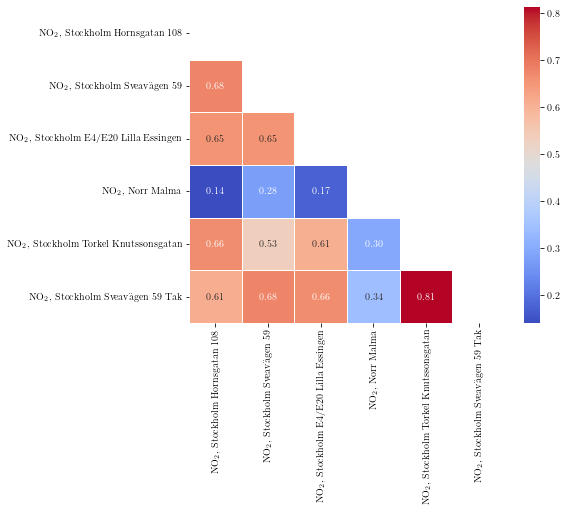

In [10]:
mat = df_NO2.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

In [11]:
# save cleaned dataframe
# df_NO2.to_csv('../air_weather_data/NO2_all_stations_cleaned.csv')